In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#数据格式化

datafile = open('Cr2O3-log.lammps', 'r', encoding='utf-8')
datas = datafile.readlines()
#print(type(datas))
datalist = []
for i in range(len(datas)-1):
    datas[i] = ' '.join(datas[i].split())
    datalist.append(datas[i])

#print(datalist)
    
datafile.close()



datafile = open('Cr2O3-log.txt', 'w')

data = '\n'.join(datalist)

datafile.write(data)

datafile.close()


In [15]:
contents = pd.read_csv('Cr2O3-log.txt', sep=' ')

star = int(input("起始行数："))

end = int(input("结束行数："))

contents = contents.iloc[star: end+1, :]

#contents = contents.drop(0)

contents.head()

起始行数：100
结束行数：200


,Step,Temp,PotEng,c_msd_all[4],c_msd_cr[4],c_msd_o[4],v_twopoint_all,v_twopoint_cr,v_twopoint_o,v_fitslope_all,v_fitslope_cr,v_fitslope_o
100,100000,302.08623,-29465.753,0.025395,0.025099,0.025592,0.000042,0.000042,0.000043,-0.000002,-0.000002,-0.000002
101,101000,292.81177,-29465.608,0.025743,0.025561,0.025856,0.000042,0.000042,0.000043,-0.000001,-0.000002,-0.000001
102,102000,299.98741,-29463.844,0.024647,0.024758,0.024487,0.000040,0.000040,0.000040,-0.000001,-0.000001,-0.000001
103,103000,291.08712,-29463.887,0.026092,0.026744,0.025630,0.000042,0.000043,0.000041,-0.000001,-0.000001,-0.000001
104,104000,306.66688,-29467.519,0.024952,0.025970,0.024252,0.000040,0.000042,0.000039,-0.000001,-0.000001,-0.000001


In [16]:
Step = contents['Step']/1000

Temp = contents['Temp']

PE = contents['PotEng']

msd_Cr2O3 = contents['c_msd_all[4]']

msd_Cr = contents['c_msd_cr[4]']

msd_O = contents['c_msd_o[4]']

v_twopoint_Cr2O3 = contents['v_twopoint_all']

v_twopoint_Cr = contents['v_twopoint_cr']

v_twopoint_O = contents['v_twopoint_o']

v_fitslope_Cr2O3 = contents['v_fitslope_all']

v_fitslope_Cr = contents['v_fitslope_cr']

v_fitslope_O = contents['v_fitslope_o']

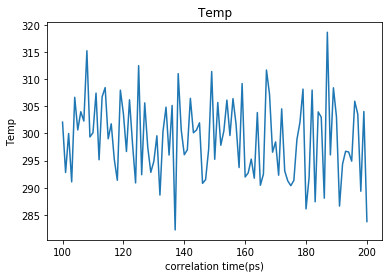

In [17]:
# Temp
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("Temp")
plt.plot(Step, Temp)
plt.title('Temp')

plt.show()

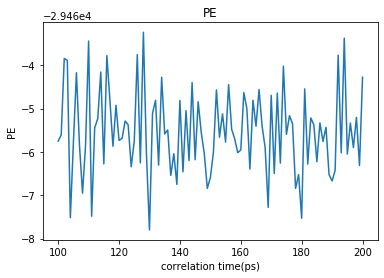

In [18]:
# Temp
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("PE")
plt.plot(Step, PE)
plt.title('PE')

plt.show()

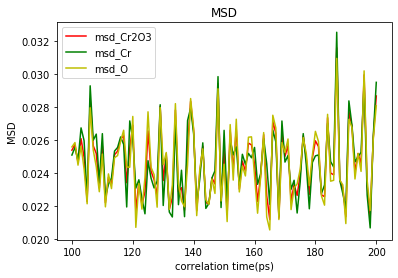

In [19]:
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("MSD")
plt.plot(Step, msd_Cr2O3, color='r', label='msd_Cr2O3')
plt.plot(Step, msd_Cr, color='g', label='msd_Cr')
plt.plot(Step, msd_O, color='y', label='msd_O')
plt.legend(loc="upper left")
plt.title('MSD')

plt.show()

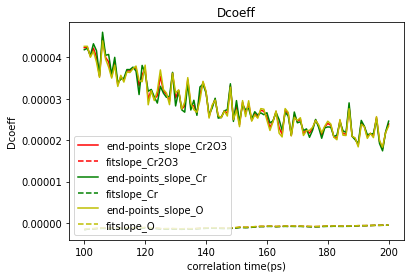

In [20]:
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("Dcoeff")
plt.plot(Step, v_twopoint_Cr2O3, color="r", linestyle='-', label='end-points_slope_Cr2O3')
plt.plot(Step, v_fitslope_Cr2O3, color="r", linestyle='--', label='fitslope_Cr2O3')
plt.plot(Step, v_twopoint_Cr, color="g", linestyle='-', label='end-points_slope_Cr')
plt.plot(Step, v_fitslope_Cr, color="g", linestyle='--', label='fitslope_Cr')
plt.plot(Step, v_twopoint_O, color="y", linestyle='-', label='end-points_slope_O')
plt.plot(Step, v_fitslope_O, color="y", linestyle='--', label='fitslope_O')
plt.legend(loc="lower left")
plt.title('Dcoeff')

plt.show()